# CO2 Emission Prediction

## Part-I [Loading the Dataset]

In [1]:
# Importing all the liberaries required to build the model from scratch
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sk

In [2]:
# Importing drive from google.colab to mount and select the dataset uploded in the drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Loading the dataset in a variable named d
d = pd.read_csv('/content/drive/MyDrive/folder_data_test/prediction_model_datasets/CO2 Emissions.csv')

In [4]:
d.head() # The top five records of database

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
0,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


**Now** that dataset is loaded, it is now time to move towards next step, i.e. core Exploratory Data Analysis(EDA).

## Part-II [EDA]

### General Info of the dataset

In [5]:
print(d)

       Make        Model   Vehicle Class  Engine Size(L)  Cylinders  \
0     ACURA          ILX         COMPACT             2.0          4   
1     ACURA          ILX         COMPACT             2.4          4   
2     ACURA   ILX HYBRID         COMPACT             1.5          4   
3     ACURA      MDX 4WD     SUV - SMALL             3.5          6   
4     ACURA      RDX AWD     SUV - SMALL             3.5          6   
...     ...          ...             ...             ...        ...   
7380  VOLVO  XC40 T5 AWD     SUV - SMALL             2.0          4   
7381  VOLVO  XC60 T5 AWD     SUV - SMALL             2.0          4   
7382  VOLVO  XC60 T6 AWD     SUV - SMALL             2.0          4   
7383  VOLVO  XC90 T5 AWD  SUV - STANDARD             2.0          4   
7384  VOLVO  XC90 T6 AWD  SUV - STANDARD             2.0          4   

     Transmission Fuel Type  Fuel Consumption City (L/100 km)  \
0             AS5         Z                               9.9   
1              M6

Dataset Info,

**Name:** CO2 Emissions

The dataset is the collection of details of cars with various columns describing their characteristics. And some about fuel consumption and targeted variable is CO2 gas emission.<br><br>
The columns details of the dqataset are as follows:

In [6]:
print(d.columns) # Getting all the columns in the dataset

Index(['Make', 'Model', 'Vehicle Class', 'Engine Size(L)', 'Cylinders',
       'Transmission', 'Fuel Type', 'Fuel Consumption City (L/100 km)',
       'Fuel Consumption Hwy (L/100 km)', 'Fuel Consumption Comb (L/100 km)',
       'Fuel Consumption Comb (mpg)', 'CO2 Emissions(g/km)'],
      dtype='object')


In [7]:
print(d.info()) # Checking the dataset info for each features

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7385 entries, 0 to 7384
Data columns (total 12 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Make                              7385 non-null   object 
 1   Model                             7385 non-null   object 
 2   Vehicle Class                     7385 non-null   object 
 3   Engine Size(L)                    7385 non-null   float64
 4   Cylinders                         7385 non-null   int64  
 5   Transmission                      7385 non-null   object 
 6   Fuel Type                         7385 non-null   object 
 7   Fuel Consumption City (L/100 km)  7385 non-null   float64
 8   Fuel Consumption Hwy (L/100 km)   7385 non-null   float64
 9   Fuel Consumption Comb (L/100 km)  7385 non-null   float64
 10  Fuel Consumption Comb (mpg)       7385 non-null   int64  
 11  CO2 Emissions(g/km)               7385 non-null   int64  
dtypes: flo

In [8]:
# Checking the stats and central tendency of the datafrafe to figureout some details
d.describe()

,Engine Size(L),Cylinders,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
count,7385.000000,7385.000000,7385.000000,7385.000000,7385.000000,7385.000000,7385.000000
mean,3.160068,5.615030,12.556534,9.041706,10.975071,27.481652,250.584699
std,1.354170,1.828307,3.500274,2.224456,2.892506,7.231879,58.512679
min,0.900000,3.000000,4.200000,4.000000,4.100000,11.000000,96.000000
25%,2.000000,4.000000,10.100000,7.500000,8.900000,22.000000,208.000000
50%,3.000000,6.000000,12.100000,8.700000,10.600000,27.000000,246.000000
75%,3.700000,6.000000,14.600000,10.200000,12.600000,32.000000,288.000000
max,8.400000,16.000000,30.600000,20.600000,26.100000,69.000000,522.000000


### Checking null values and duplicate records in dataset

In [9]:
print(d.isnull().sum()) # Fetching out the count of nulls in each columns

Make                                0
Model                               0
Vehicle Class                       0
Engine Size(L)                      0
Cylinders                           0
Transmission                        0
Fuel Type                           0
Fuel Consumption City (L/100 km)    0
Fuel Consumption Hwy (L/100 km)     0
Fuel Consumption Comb (L/100 km)    0
Fuel Consumption Comb (mpg)         0
CO2 Emissions(g/km)                 0
dtype: int64


There are no any missing data in the dataset so, it is now okay to move forward.

In [10]:
# To know the duplicated records in dataset
print(d.duplicated().sum())

1103


Since that there are more than 1100 duplicates but dataset has 7385 entries. Dropping duplicates is the best approach to proceed further.

In [11]:
d = d.drop_duplicates() # Droping the duplicates from the dataset

In [30]:
print(d.duplicated().sum()) # Rechecking the duplicated records counts in dataset

0


### Analyzing the dataset with Visualization

Visualization with various plots for every numeric columns.


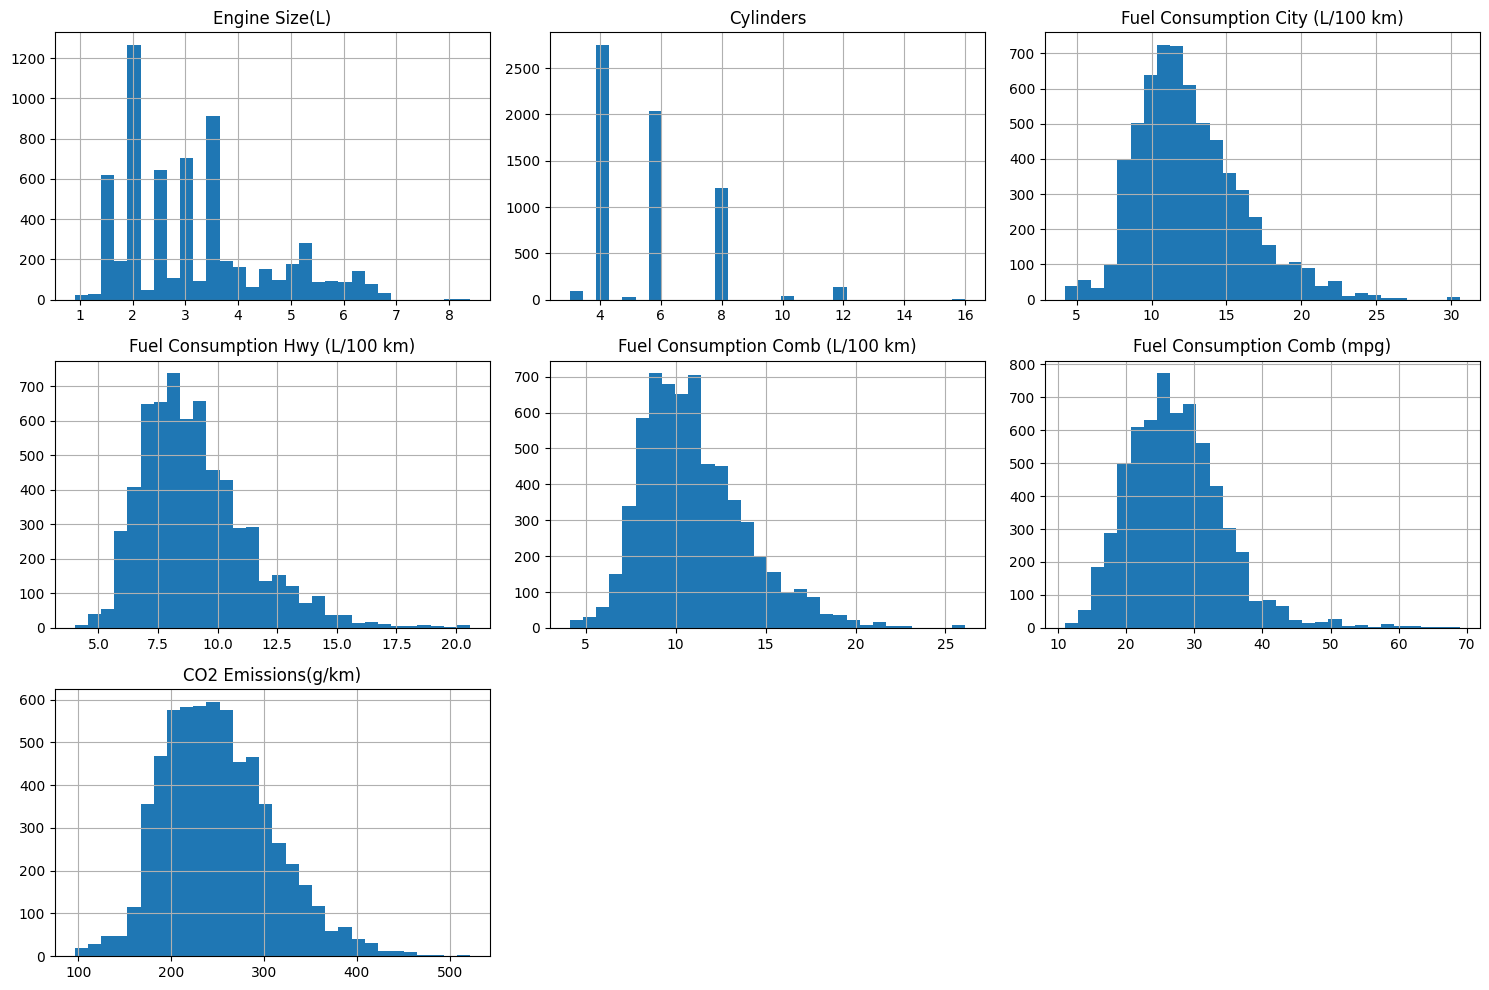

In [13]:
# Histogram plot
d.hist(bins=30, figsize=(15,10))
plt.tight_layout()
plt.show()

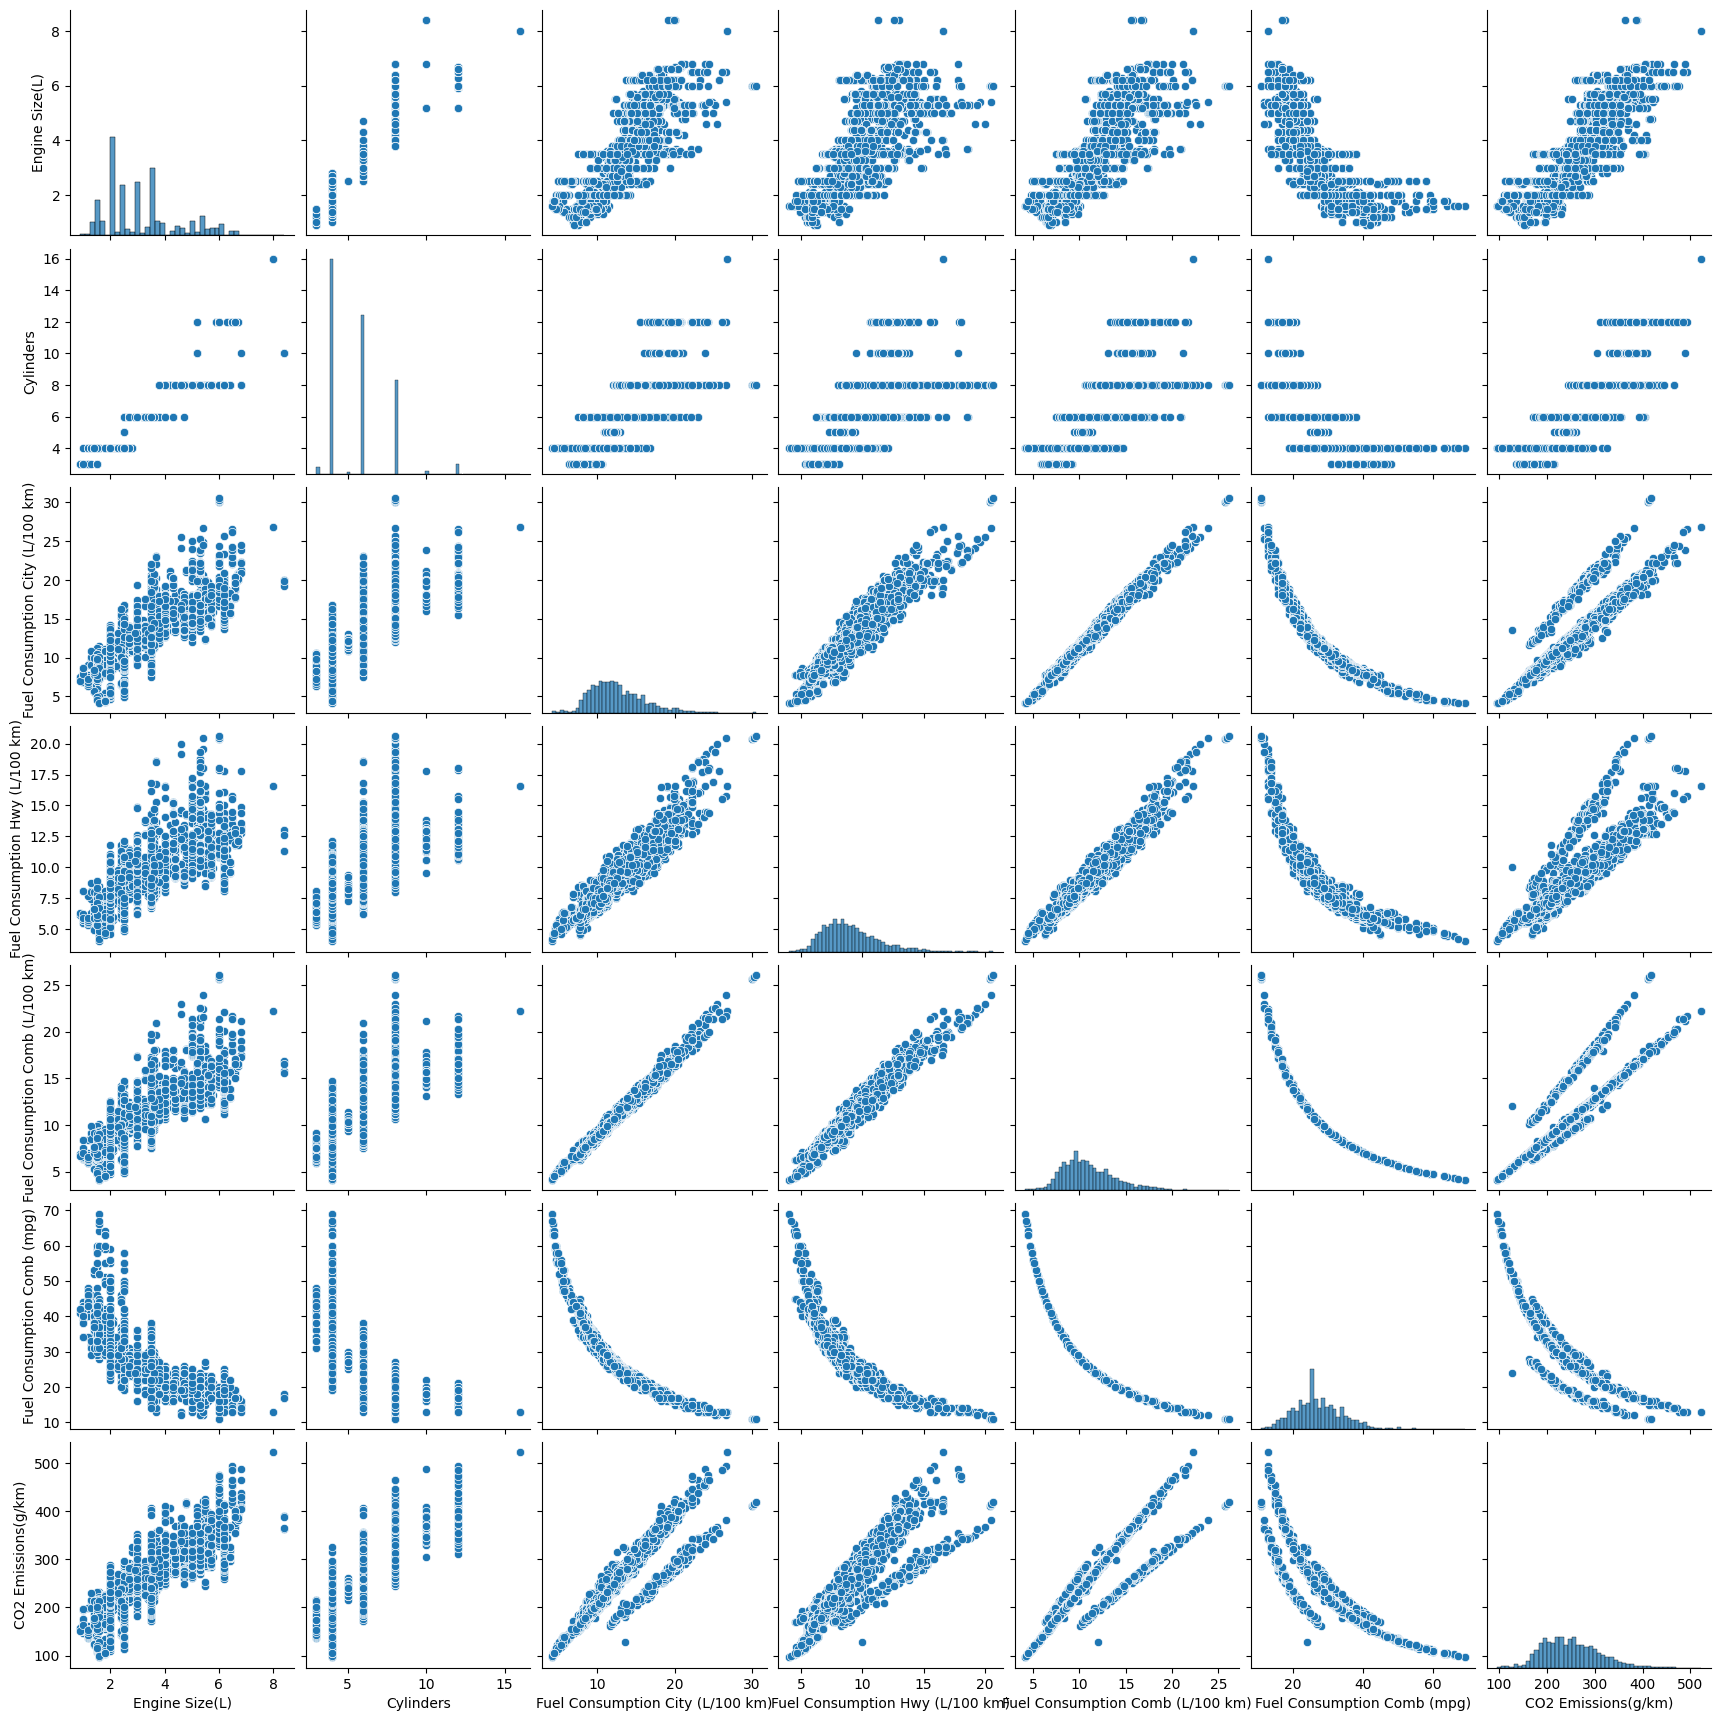

In [14]:
# PAir plot
sns.pairplot(d)
plt.show()

In [15]:
# Deselecting the objects columns to grasp correrelation details in heatmap
d_numeric = d.select_dtypes(exclude='object')

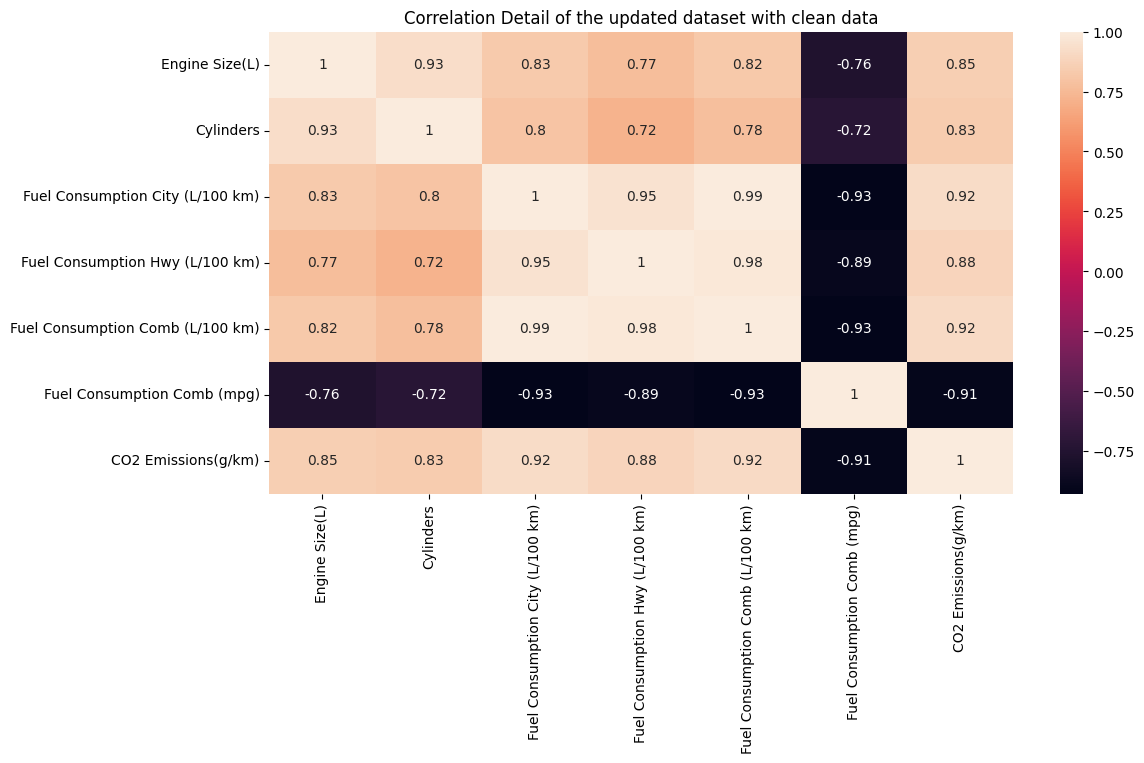

In [16]:
# heatmap plot
plt.figure(figsize=(12,6))
sns.heatmap(d_numeric.corr(), annot=True)
plt.title('Correlation Detail of the updated dataset with clean data')
plt.show()

In [17]:
# There seems to be an unwanted column missed to drop, lets drop it
# dropping the Fuel Consumption Comb (mpg) column
d = d.drop(columns=['Fuel Consumption Comb (mpg)'])

## part-III Building Models

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

In [19]:
# Placing the independent features on X variable and targeted cnt feature on y variable from the dataset
X = d.drop('CO2 Emissions(g/km)', axis=1)
y = d['CO2 Emissions(g/km)']

In [20]:
# Splitting the dataset into training and testing data
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=7777)

In [21]:
# Reviewing the shape of testing and training data
print('X_train: ', X_train.shape, '& X_trst: ', X_test.shape)
print('y_train: ', y_train.shape, '& y_trst: ', y_test.shape)

X_train:  (5025, 10) & X_trst:  (1257, 10)
y_train:  (5025,) & y_trst:  (1257,)


In [22]:
# Defining the numeric and categorical columns in the dataset
d_numeric = ['Engine Size(L)', 'Cylinders', 'Fuel Consumption City (L/100 km)', 'Fuel Consumption Hwy (L/100 km)', 'Fuel Consumption Comb (L/100 km)']
d_categorical = ['Make', 'Model', 'Vehicle Class', 'Transmission', 'Fuel Type']

In [23]:
categorical_transformer = OneHotEncoder(handle_unknown='ignore')
numeric_transformer = StandardScaler() # StandardScaler will normalize the numeric features

In [24]:
# Creating transformers for the numeric and categorical features
# Creating column transformer has made appropriate transformations to the numeric and categorical features
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, d_numeric),
        ('cat', categorical_transformer, d_categorical)
    ])

In [25]:
# Creating a pipeline that first applies the preprocessing steps and then fits linear regression model
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

In [26]:
model.fit(X_train, y_train) # training the dataset

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['Engine Size(L)',
                                                   'Cylinders',
                                                   'Fuel Consumption City '
                                                   '(L/100 km)',
                                                   'Fuel Consumption Hwy '
                                                   '(L/100 km)',
                                                   'Fuel Consumption Comb '
                                                   '(L/100 km)']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['Make', 'Model',
                                                   'Vehicle Class',
                                                   'Transmission',
                                                   'Fuel Type'])])),
                ('regressor', RandomForestRegressor())])

In [27]:
y_pred = model.predict(X_test) # predicting the models performance

In [28]:
# Calculating various scores to determine models performance
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)

In [29]:
# Displaying
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R-squared (R²): {r2}")

Mean Absolute Error (MAE): 2.086081325529417
Mean Squared Error (MSE): 8.676288665934836
Root Mean Squared Error (RMSE): 2.945554050757656
R-squared (R²): 0.9974289462077819


The linear regression model for predicting CO2 emissions performs exceptionally well. With a Mean Absolute Error (MAE) of 2.086 g/km and a Root Mean Squared Error (RMSE) of 2.946 g/km, the model's predictions are very close to the actual values. The R-squared (R²) value of 0.997 indicates that the model explains 99.7% of the variance in CO2 emissions, showing high accuracy and reliability. These metrics suggest the model is highly effective and can be trusted for practical applications like environmental impact assessments and vehicle performance evaluations.

Thus the model can be exported to be integrated onapplication.